In [1]:
import sys
sys.path.append('../')
import os
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from utils.datasets import ImageNameDataset
import shutil
#from utils.imageprocessing import show_image
#from utils.datasets import load_image

from tqdm.auto import tqdm

/home/ubuntu/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
standard_train_folder = '../data/2024-04-13_dataset/standard/train'
standard_test_folder = '../data/2024-04-13_dataset/standard/test'

train_folder = '../data/2024-04-13_dataset/augmentated/train'
test_folder = '../data/2024-04-13_dataset/augmentated/test'

train_images_folder = os.path.join(train_folder,'images')
train_masks_folder = os.path.join(train_folder,'masks')
test_images_folder = os.path.join(test_folder,'images')
test_masks_folder = os.path.join(test_folder,'masks')

os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_masks_folder, exist_ok=True)
os.makedirs(test_images_folder, exist_ok=True)
os.makedirs(test_masks_folder, exist_ok=True)


In [3]:
train_set = ImageNameDataset(standard_train_folder, sort = True)

train_images = [sample['image'] for sample in train_set]
train_masks = [sample['mask'] for sample in train_set]

test_set = ImageNameDataset(standard_test_folder, sort = True)

test_images = [sample['image'] for sample in test_set]
test_masks = [sample['mask'] for sample in test_set]

In [4]:
for path in train_images:
    shutil.copy(path,train_images_folder)
for path in train_masks:
    shutil.copy(path,train_masks_folder)
for path in test_images:
    shutil.copy(path,test_images_folder)
for path in test_masks:
    shutil.copy(path,test_masks_folder)

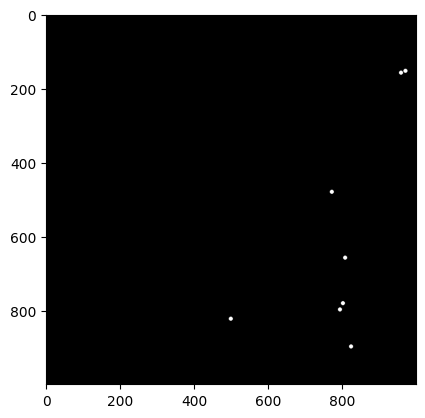

In [53]:
image = Image.open('../data/2024-03-16_dataset/augmentated/train/images/tile_tif_0_13.png')
mask = Image.open('../data/2024-03-16_dataset/augmentated/train/masks/tile_shp_0_13.png')
#show_image('../data/2024-03-16_dataset/augmentated/train/images/tile_tif_0_13.png')
plt.imshow(mask)

In [22]:
os.listdir(train_images_folder)

['tile_tif_2_68.png',
 'tile_tif_29_73.png',
 'tile_tif_59_23.png',
 'tile_tif_9_66.png',
 'tile_tif_66_27.png',
 'tile_tif_76_34.png',
 'tile_tif_66_42.png',
 'tile_tif_71_65.png',
 'tile_tif_35_27.png',
 'tile_tif_73_56.png',
 'tile_tif_82_24.png',
 'tile_tif_69_67.png',
 'tile_tif_28_21.png',
 'tile_tif_76_61.png',
 'tile_tif_51_38.png',
 'tile_tif_67_40.png',
 'tile_tif_12_71.png',
 'tile_tif_59_69.png',
 'tile_tif_75_44.png',
 'tile_tif_73_9.png',
 'tile_tif_52_6.png',
 'tile_tif_85_78.png',
 'tile_tif_6_76.png',
 'tile_tif_67_42.png',
 'tile_tif_65_65.png',
 'tile_tif_70_44.png',
 'tile_tif_48_8.png',
 'tile_tif_81_52.png',
 'tile_tif_65_29.png',
 'tile_tif_73_37.png',
 'tile_tif_59_3.png',
 'tile_tif_8_65.png',
 'tile_tif_86_36.png',
 'tile_tif_59_57.png',
 'tile_tif_40_53.png',
 'tile_tif_48_6.png',
 'tile_tif_87_32.png',
 'tile_tif_49_39.png',
 'tile_tif_82_53.png',
 'tile_tif_65_66.png',
 'tile_tif_54_77.png',
 'tile_tif_75_24.png',
 'tile_tif_76_60.png',
 'tile_tif_86_20.png

In [5]:
def rotate_train_pairs():
    t_rot_90= T.RandomRotation((90,90))
    t_rot_180 = T.RandomRotation((180,180))
    t_rot_270 = T.RandomRotation((270,270))
    
    image_filenames = os.listdir(train_images_folder)
    total_len = len(image_filenames)
    with tqdm(total=total_len, desc='generating rotated images') as pbar:
        for image_filename in image_filenames:
            image = Image.open(os.path.join(train_images_folder,image_filename))
            filename_splitext = image_filename.split('.')
            t_rot_90(image).save(os.path.join(train_images_folder,filename_splitext[0]+'_90.'+filename_splitext[1]))
            t_rot_180(image).save(os.path.join(train_images_folder,filename_splitext[0]+'_180.'+filename_splitext[1]))
            t_rot_270(image).save(os.path.join(train_images_folder,filename_splitext[0]+'_270.'+filename_splitext[1]))

            mask_filename = image_filename.replace('tif','shp')

            mask = Image.open(os.path.join(train_masks_folder, mask_filename))
            filename_splitext = mask_filename.split('.')
            t_rot_90(mask).save(os.path.join(train_masks_folder,filename_splitext[0]+'_90.'+filename_splitext[1]))
            t_rot_180(mask).save(os.path.join(train_masks_folder,filename_splitext[0]+'_180.'+filename_splitext[1]))
            t_rot_270(mask).save(os.path.join(train_masks_folder,filename_splitext[0]+'_270.'+filename_splitext[1]))
            pbar.update(1)
rotate_train_pairs()

generating rotated images: 100%|████████████| 1699/1699 [01:08<00:00, 24.77it/s]


## Data Check

In [6]:
from utils.datasetvalidation import check_images_size

In [7]:
check_images_size('../data/2024-03-16-dataset/augmentated')

KeyboardInterrupt: 

In [4]:
check_images_size('../data/2024-03-16-dataset/augmentated')

error: .ipynb_checkpoints
error: .ipynb_checkpoints
